In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats



In [2]:
default = pd.read_csv('prediktiv_data.csv')
print(default.shape)




(2930, 26)


In [3]:
default.head()

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,...,2,good,bad,3,1,5,2010,0,0,1960
1,2,105000,1.0,730.0,0,882.0,896,5,896,5,...,0,NaN,bad,2,1,6,2010,0,0,1961
2,3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,...,0,NaN,good,3,1,6,2010,1,0,1958
3,4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,...,2,bad,amazing,3,1,4,2010,1,0,1968
4,5,189900,2.0,482.0,0,928.0,928,6,1629,5,...,1,bad,bad,3,1,3,2010,1,701,1998


## Handling missing values

In [5]:
#As we can see 3 features have a lot of missing values
default.isna().sum()


id                0
target            0
feature01         1
feature02         1
feature03         0
feature04         1
feature05         0
feature06         0
feature07         0
feature08         0
feature09         0
feature10         0
feature10.1       0
feature11      2732
feature12      2358
feature13         1
feature14         0
feature15      1422
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
dtype: int64

In [6]:
default.fillna("").count()


id             2930
target         2930
feature01      2930
feature02      2930
feature03      2930
feature04      2930
feature05      2930
feature06      2930
feature07      2930
feature08      2930
feature09      2930
feature10      2930
feature10.1    2930
feature11      2930
feature12      2930
feature13      2930
feature14      2930
feature15      2930
feature16      2930
feature17      2930
feature18      2930
feature19      2930
feature20      2930
feature21      2930
feature22      2930
feature23      2930
dtype: int64

### Percentage of NA Values

In [7]:
100*(default.isna().sum()/default.fillna("").count())

id              0.000000
target          0.000000
feature01       0.034130
feature02       0.034130
feature03       0.000000
feature04       0.034130
feature05       0.000000
feature06       0.000000
feature07       0.000000
feature08       0.000000
feature09       0.000000
feature10       0.000000
feature10.1     0.000000
feature11      93.242321
feature12      80.477816
feature13       0.034130
feature14       0.000000
feature15      48.532423
feature16       0.000000
feature17       0.000000
feature18       0.000000
feature19       0.000000
feature20       0.000000
feature21       0.000000
feature22       0.000000
feature23       0.000000
dtype: float64

In [8]:
(100*(default.isna().sum()/default.fillna("").count())[100*(default.isna().sum()/default.fillna("").count())>40])

feature11    93.242321
feature12    80.477816
feature15    48.532423
dtype: float64

In [9]:
list((100*(default.isna().sum()/default.fillna("").count())[100*(default.isna().sum()/default.fillna("").count())>40]).index)

['feature11', 'feature12', 'feature15']

In [10]:
# Dropping feature11 feature12 and feature15 because of missing values
default.drop(list((100*(default.isna().sum()/default.fillna("").count())[100*(default.isna().sum()/default.fillna("").count())>40]).index), axis = 1, inplace=True)

In [11]:
default.columns

Index(['id', 'target', 'feature01', 'feature02', 'feature03', 'feature04',
       'feature05', 'feature06', 'feature07', 'feature08', 'feature09',
       'feature10', 'feature10.1', 'feature13', 'feature14', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23'],
      dtype='object')

In [12]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [13]:
len(default)

2930

In [14]:
#Addressing Categorical Values

In [15]:
default[(default.nunique()[default.nunique()<15]).index]

,feature01,feature03,feature06,feature08,feature09,feature10.1,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21
0,2.00,0,7,6,5,1,red,2,bad,3,1,5,2010,0
1,1.00,0,5,5,6,1,red,0,bad,2,1,6,2010,0
2,1.00,0,6,6,6,1,red,0,good,3,1,6,2010,1
3,2.00,0,8,7,5,2,red,2,amazing,3,1,4,2010,1
4,2.00,0,6,5,5,2,red,1,bad,3,1,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2.00,0,6,6,6,1,red,0,bad,3,1,3,2006,0
2926,2.00,0,5,5,5,1,red,0,bad,2,1,6,2006,0
2927,0.00,0,6,5,5,1,red,0,bad,3,1,7,2006,0
2928,2.00,0,6,5,5,1,red,1,bad,2,1,4,2006,0


In [145]:
default.nunique()

id             2927
target         1031
feature01         6
feature02       603
feature03        14
feature04      1058
feature05      1083
feature06        14
feature07      1292
feature08        10
feature09         9
feature10       118
feature10.1       5
feature13         5
feature14         5
feature16         5
feature17         8
feature18         4
feature19        12
feature20         5
feature21         3
feature22       635
feature23        61
dtype: int64

In [146]:
list((default.nunique()[default.nunique()<15]).index)

['feature01',
 'feature03',
 'feature06',
 'feature08',
 'feature09',
 'feature10.1',
 'feature13',
 'feature14',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21']

In [16]:
categorical=list((default.nunique()[default.nunique()<15]).index)

In [17]:
continuous=list((default.nunique()[default.nunique()>15]).index)[1:]

In [147]:
continuous

['feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23']

In [19]:
for column in default.columns[1:]:
    print(column,default[column].nunique())

target 1032
feature01 6
feature02 603
feature03 14
feature04 1058
feature05 1083
feature06 14
feature07 1292
feature08 10
feature09 9
feature10 118
feature10.1 5
feature13 5
feature14 5
feature16 5
feature17 8
feature18 4
feature19 12
feature20 5
feature21 3
feature22 635
feature23 61


In [148]:
default.isna().sum()

id             0
target         0
feature01      0
feature02      0
feature03      0
feature04      0
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      0
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64

In [149]:
len(default)

2927

In [20]:
# From above result we can see that feature01,feature03

In [21]:
default.describe()

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23
count,2930.00,2930.00,2929.00,2929.00,2930.00,2929.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,180796.06,1.77,472.82,2.24,1051.61,1159.56,6.44,1499.69,6.09,5.56,1971.36,1.57,0.60,2.85,1.04,6.22,2007.79,0.38,335.46,1984.27
std,845.96,79886.69,0.76,215.05,35.60,440.62,391.89,1.57,505.51,1.41,1.11,30.25,0.55,0.65,0.83,0.21,2.71,1.32,0.50,428.40,20.86
min,1.00,12789.00,0.00,0.00,0.00,0.00,334.00,2.00,334.00,1.00,1.00,1872.00,0.00,0.00,0.00,0.00,1.00,2006.00,0.00,0.00,1950.00
25%,733.25,129500.00,1.00,320.00,0.00,793.00,876.25,5.00,1126.00,5.00,5.00,1954.00,1.00,0.00,2.00,1.00,4.00,2007.00,0.00,0.00,1965.00
50%,1465.50,160000.00,2.00,480.00,0.00,990.00,1084.00,6.00,1442.00,6.00,5.00,1973.00,2.00,1.00,3.00,1.00,6.00,2008.00,0.00,0.00,1993.00
75%,2197.75,213500.00,2.00,576.00,0.00,1302.00,1384.00,7.00,1742.75,7.00,6.00,2001.00,2.00,1.00,3.00,1.00,8.00,2009.00,1.00,703.75,2004.00
max,2930.00,755000.00,5.00,1488.00,800.00,6110.00,5095.00,15.00,5642.00,10.00,9.00,2010.00,4.00,4.00,8.00,3.00,12.00,2010.00,2.00,2065.00,2010.00


In [22]:
for column in default.columns[1:]:
    display(pd.DataFrame(default[column].value_counts()))

,target
135000,34
140000,33
130000,29
155000,28
145000,26
...,...
292500,1
446261,1
136870,1
313000,1


,feature01
2.00,1603
1.00,778
3.00,374
0.00,157
4.00,16
5.00,1


,feature02
0.00,157
576.00,97
440.00,96
484.00,76
240.00,69
...,...
208.00,1
815.00,1
1043.00,1
1184.00,1


,feature03
0,2917
144,1
228,1
368,1
444,1
480,1
512,1
576,1
648,1
738,1


,feature04
0.00,79
864.00,74
672.00,29
912.00,26
1040.00,25
...,...
1603.00,1
5095.00,1
839.00,1
2630.00,1


,feature05
864,46
1040,28
912,19
848,18
960,18
...,...
2028,1
2032,1
2034,1
2048,1


,feature06
6,844
7,649
5,586
8,347
4,203
9,143
10,80
11,32
3,26
12,16


,feature07
864,41
1092,26
1040,25
1456,20
1200,18
...,...
2128,1
2132,1
2134,1
2136,1


,feature08
5,825
6,732
7,602
8,350
4,226
9,107
3,40
10,31
2,13
1,4


,feature09
5,1654
6,533
7,390
8,144
4,101
3,50
9,41
2,10
1,7


,feature10
2005,142
2006,138
2007,109
2004,99
2003,88
1977,57
1920,57
1976,54
1999,52
2008,49


,feature10.1
2,1532
1,1318
3,64
0,12
4,4


,feature13
red,2682
blue,188
green,50
yellow,8
pink,1


,feature14
0,1422
1,1274
2,221
3,12
4,1


,feature16
bad,1494
good,1160
amazing,205
okay,70
horrible,1


,feature17
3,1597
2,743
4,400
1,112
5,48
6,21
0,8
8,1


,feature18
1,2796
2,129
0,3
3,2


,feature19
6,505
7,449
5,395
4,279
8,233
3,232
10,173
9,161
11,143
2,133


,feature20
2007,694
2009,648
2006,625
2008,622
2010,341


,feature21
0,1843
1,1062
2,25


,feature22
0,1678
546,23
728,18
504,17
600,13
...,...
1872,1
1862,1
1836,1
1818,1


,feature23
1950,361
2006,202
2007,164
2005,141
2004,111
2000,104
2003,99
2002,82
2008,81
1998,79


In [23]:
#default.drop(['feature03', 'feature11', 'feature12', 'feature15'], axis = 1, inplace=True)

In [24]:
#default.dropna(inplace=True)




In [25]:
# Visualisation

In [27]:
default

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,1,215000,2.00,528.00,0,1080.00,1656,7,1656,6,5,1960,1,red,2,bad,3,1,5,2010,0,0,1960
1,2,105000,1.00,730.00,0,882.00,896,5,896,5,6,1961,1,red,0,bad,2,1,6,2010,0,0,1961
2,3,172000,1.00,312.00,0,1329.00,1329,6,1329,6,6,1958,1,red,0,good,3,1,6,2010,1,0,1958
3,4,244000,2.00,522.00,0,2110.00,2110,8,2110,7,5,1968,2,red,2,amazing,3,1,4,2010,1,0,1968
4,5,189900,2.00,482.00,0,928.00,928,6,1629,5,5,1997,2,red,1,bad,3,1,3,2010,1,701,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,142500,2.00,588.00,0,1003.00,1003,6,1003,6,6,1984,1,red,0,bad,3,1,3,2006,0,0,1984
2926,2927,131000,2.00,484.00,0,864.00,902,5,902,5,5,1983,1,red,0,bad,2,1,6,2006,0,0,1983
2927,2928,132000,0.00,0.00,0,912.00,970,6,970,5,5,1992,1,red,0,bad,3,1,7,2006,0,0,1992
2928,2929,170000,2.00,418.00,0,1389.00,1389,6,1389,5,5,1974,1,red,1,bad,2,1,4,2006,0,0,1975


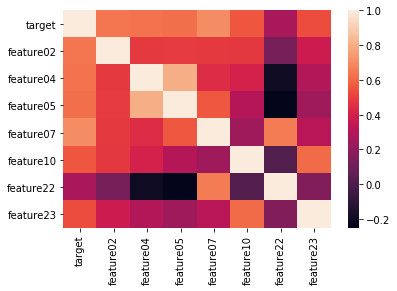

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px
import plotly.figure_factory as ff

sns.heatmap(default[list(continuous)].corr())

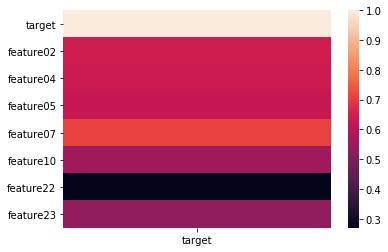

In [37]:
sns.heatmap(default[list(continuous)].corr()[['target']])

In [38]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

## Univariate Analysis

In [39]:
# Creating a function for univariate analysis
def uni(df,col,v,hue =None):

    sns.set(style="darkgrid")
    
    if v == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0], color="#da0463")
        plt.yscale('log')
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile", color="#f85959")
        plt.yscale('log')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v', color="#d89cf6")
        plt.yscale('log')
    
    if v == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, color="#4CB391", order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

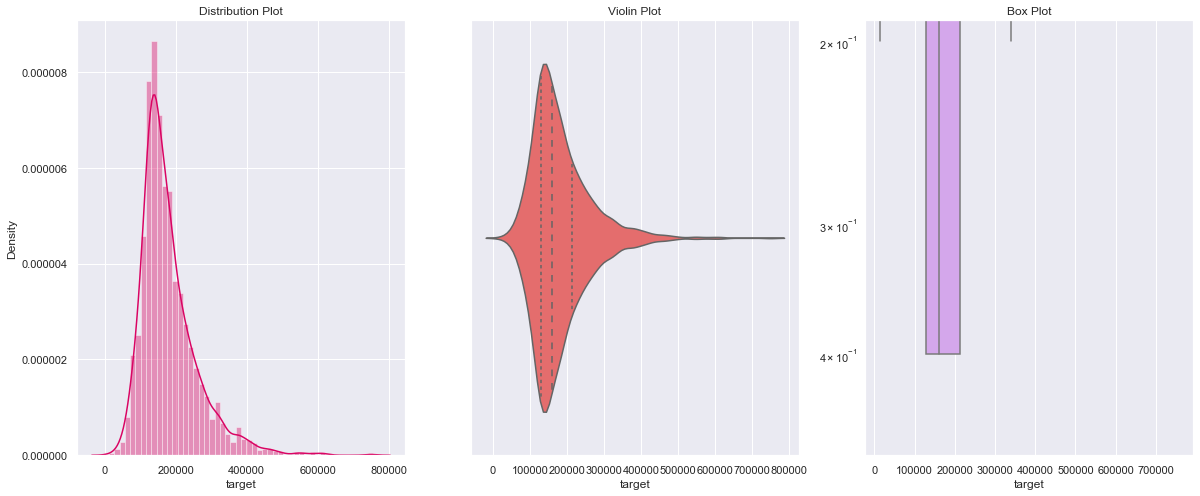

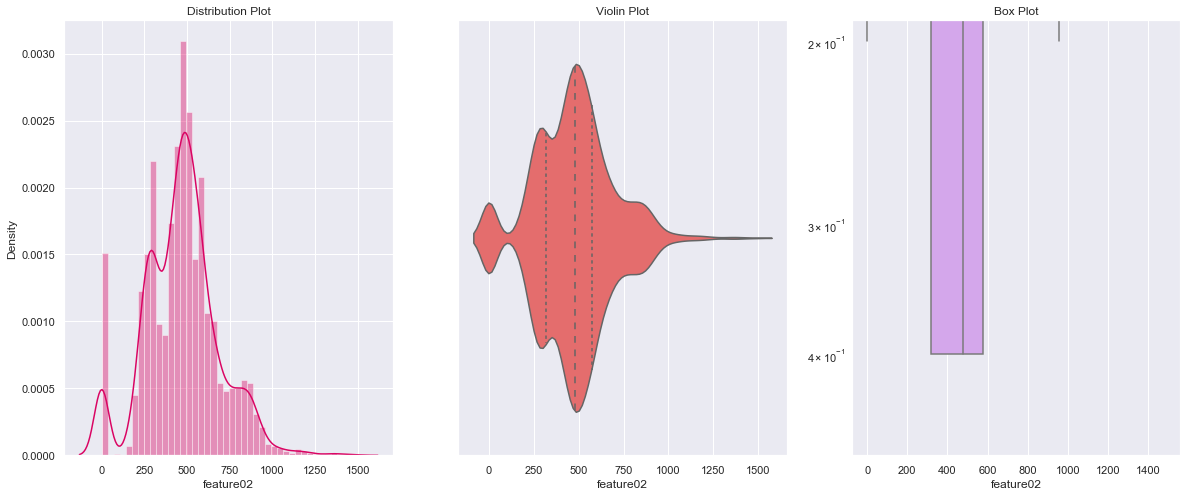

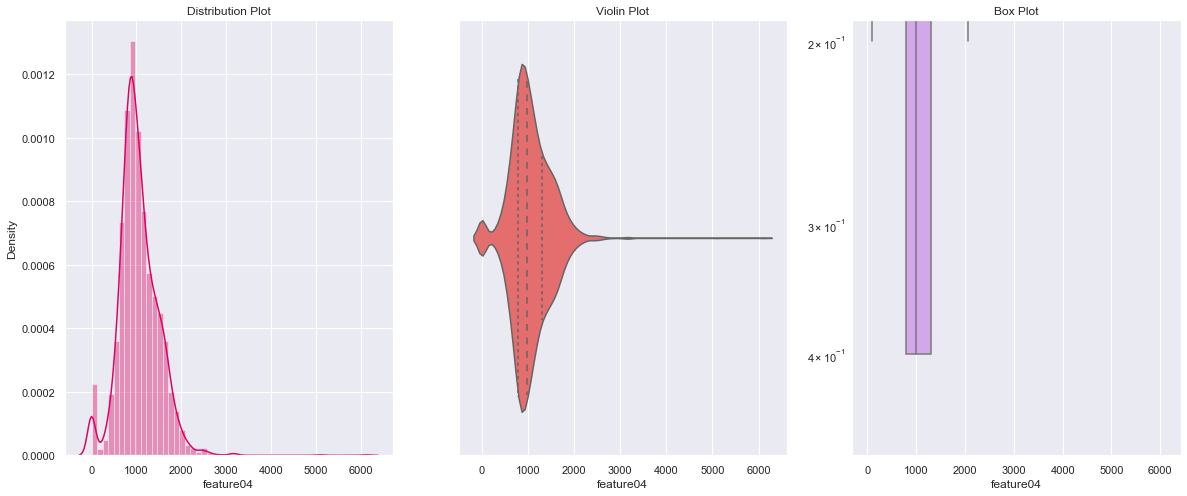

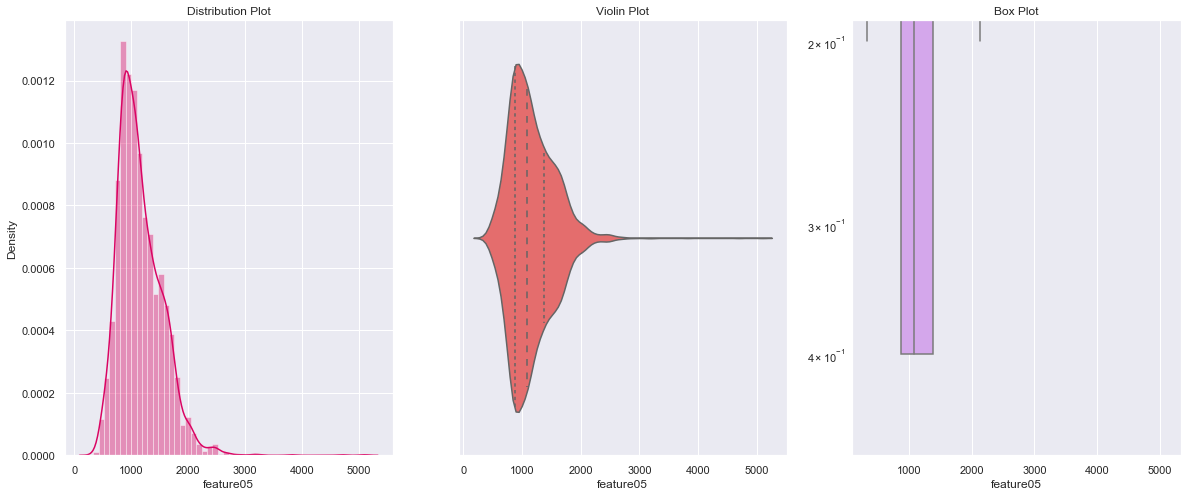

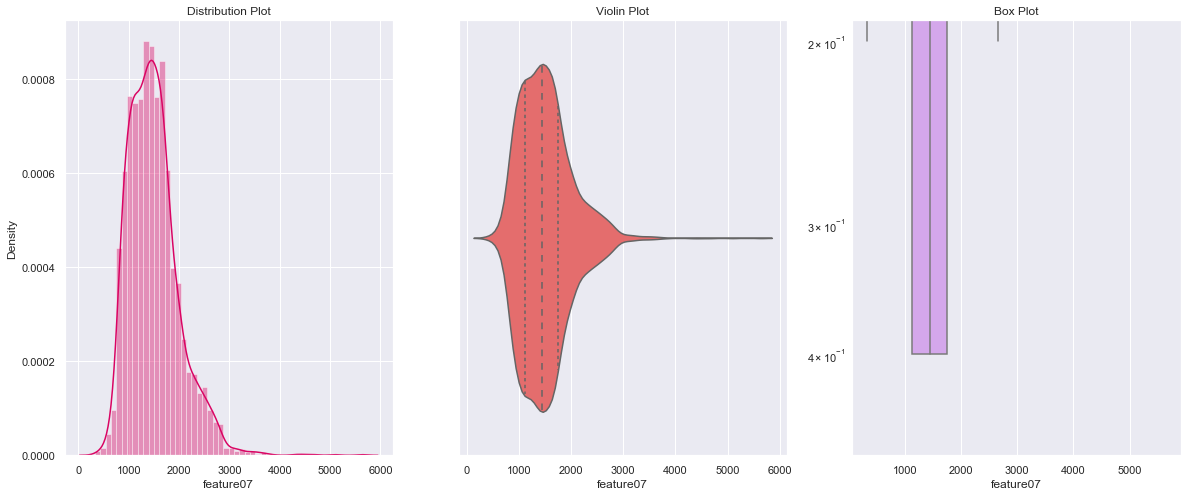

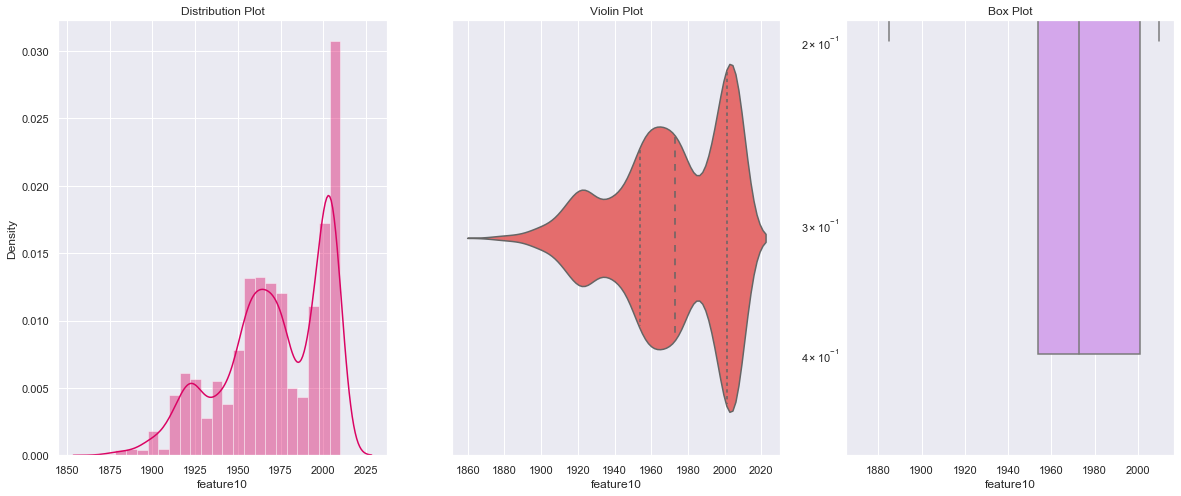

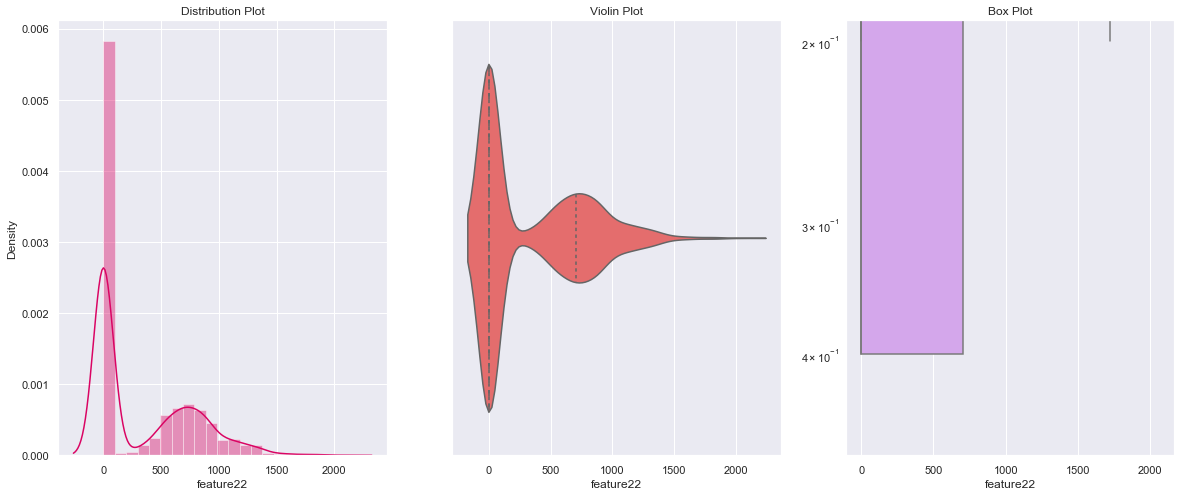

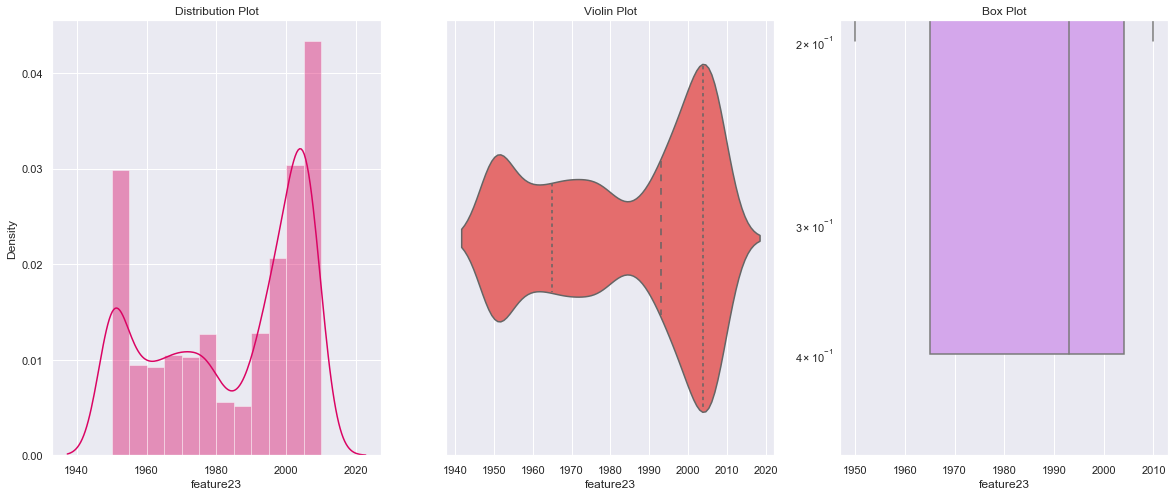

In [41]:
for cols in continuous:
    uni(df=default,col=cols,v=0)

In [42]:
# From above plots we can see that most of the features have good spread

In [47]:
categorical

['feature01',
 'feature03',
 'feature06',
 'feature08',
 'feature09',
 'feature10.1',
 'feature13',
 'feature14',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21']

In [52]:
default['feature06'].value_counts()

6     844
7     649
5     586
8     347
4     203
9     143
10     80
11     32
3      26
12     16
2       1
14      1
13      1
15      1
Name: feature06, dtype: int64

## Bivariate and Multivariate Analysis

In [56]:
default.head()

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,1,215000,2.00,528.00,0,1080.00,1656,7,1656,6,5,1960,1,red,2,bad,3,1,5,2010,0,0,1960
1,2,105000,1.00,730.00,0,882.00,896,5,896,5,6,1961,1,red,0,bad,2,1,6,2010,0,0,1961
2,3,172000,1.00,312.00,0,1329.00,1329,6,1329,6,6,1958,1,red,0,good,3,1,6,2010,1,0,1958
3,4,244000,2.00,522.00,0,2110.00,2110,8,2110,7,5,1968,2,red,2,amazing,3,1,4,2010,1,0,1968
4,5,189900,2.00,482.00,0,928.00,928,6,1629,5,5,1997,2,red,1,bad,3,1,3,2010,1,701,1998


In [55]:
continuous

['target',
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23']

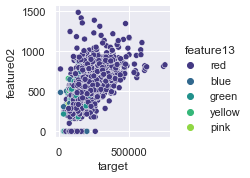

In [57]:
sns.pairplot(default,x_vars='target',y_vars='feature02',hue='feature13',palette='viridis')

In [58]:
continuous

['target',
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23']

In [62]:
default.nunique()

id             2930
target         1032
feature01         6
feature02       603
feature03        14
feature04      1058
feature05      1083
feature06        14
feature07      1292
feature08        10
feature09         9
feature10       118
feature10.1       5
feature13         5
feature14         5
feature16         5
feature17         8
feature18         4
feature19        12
feature20         5
feature21         3
feature22       635
feature23        61
dtype: int64

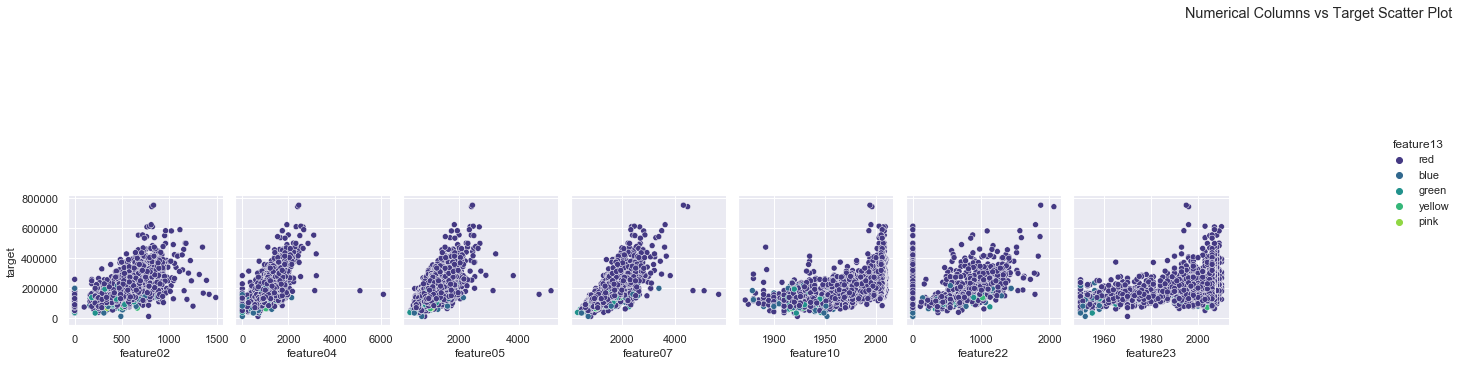

In [61]:
# pairplot of numerical columns
g = sns.pairplot(default,x_vars=(
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23'), y_vars="target", hue ='feature13', palette = 'viridis')
g.fig.suptitle("Numerical Columns vs Target Scatter Plot", y=2,x=1)
plt.show()

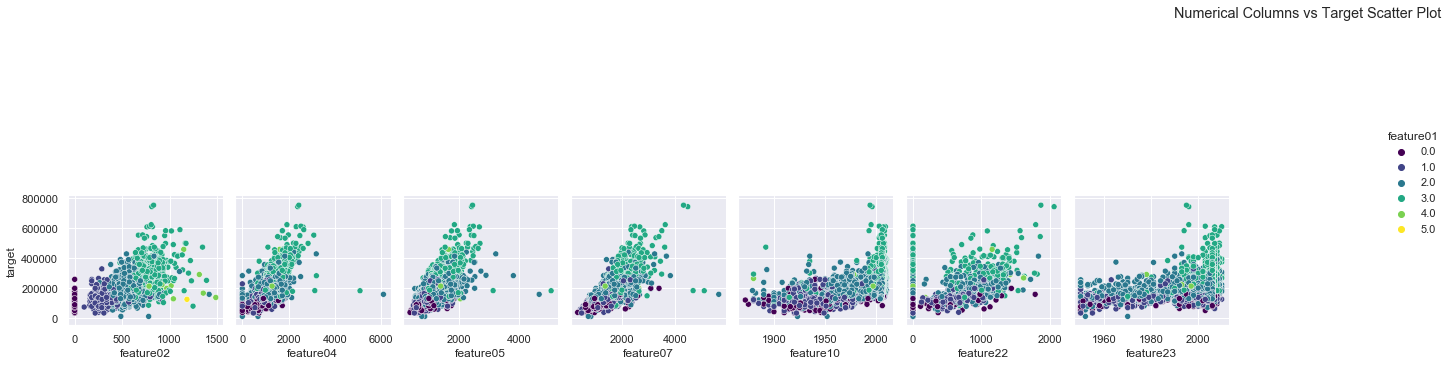

In [63]:
# pairplot of numerical columns
g = sns.pairplot(default,x_vars=(
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23'), y_vars="target", hue ='feature01', palette = 'viridis')
g.fig.suptitle("Numerical Columns vs Target Scatter Plot", y=2,x=1)
plt.show()

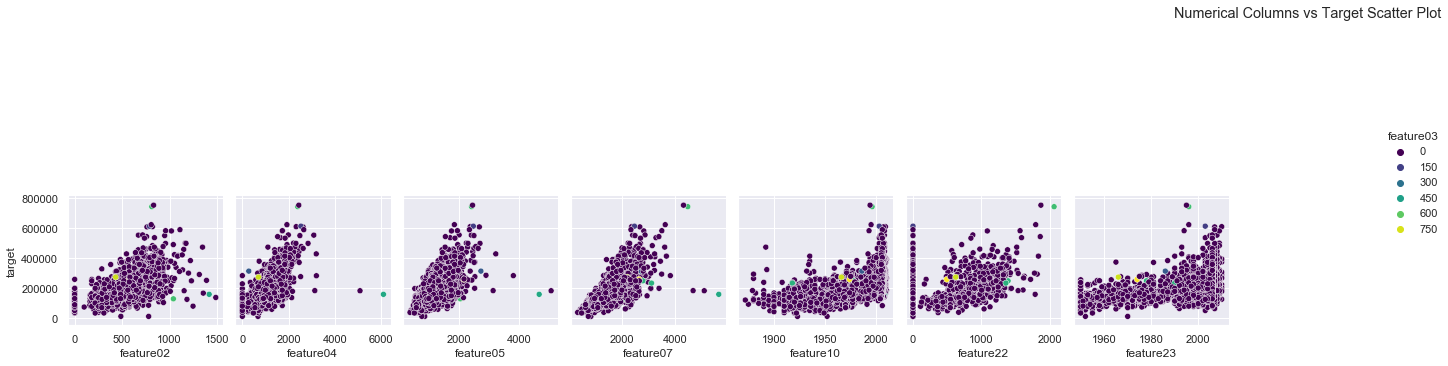

In [64]:
# pairplot of numerical columns
g = sns.pairplot(default,x_vars=(
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23'), y_vars="target", hue ='feature03', palette = 'viridis')
g.fig.suptitle("Numerical Columns vs Target Scatter Plot", y=2,x=1)
plt.show()

In [65]:
categorical

['feature01',
 'feature03',
 'feature06',
 'feature08',
 'feature09',
 'feature10.1',
 'feature13',
 'feature14',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21']

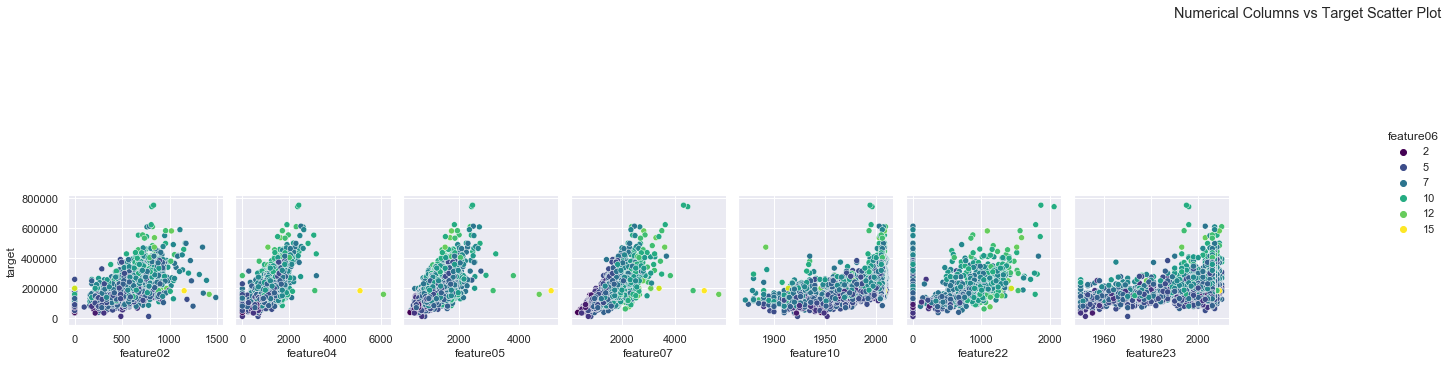

In [66]:
# pairplot of numerical columns
g = sns.pairplot(default,x_vars=(
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23'), y_vars="target", hue ='feature06', palette = 'viridis')
g.fig.suptitle("Numerical Columns vs Target Scatter Plot", y=2,x=1)
plt.show()

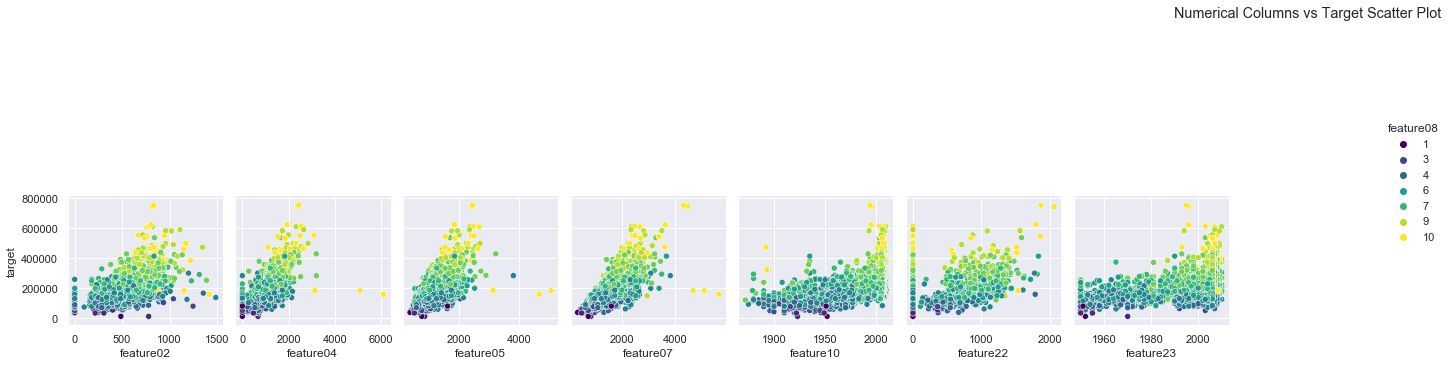

In [67]:
# pairplot of numerical columns
g = sns.pairplot(default,x_vars=(
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23'), y_vars="target", hue ='feature08', palette = 'viridis')
g.fig.suptitle("Numerical Columns vs Target Scatter Plot", y=2,x=1)
plt.show()

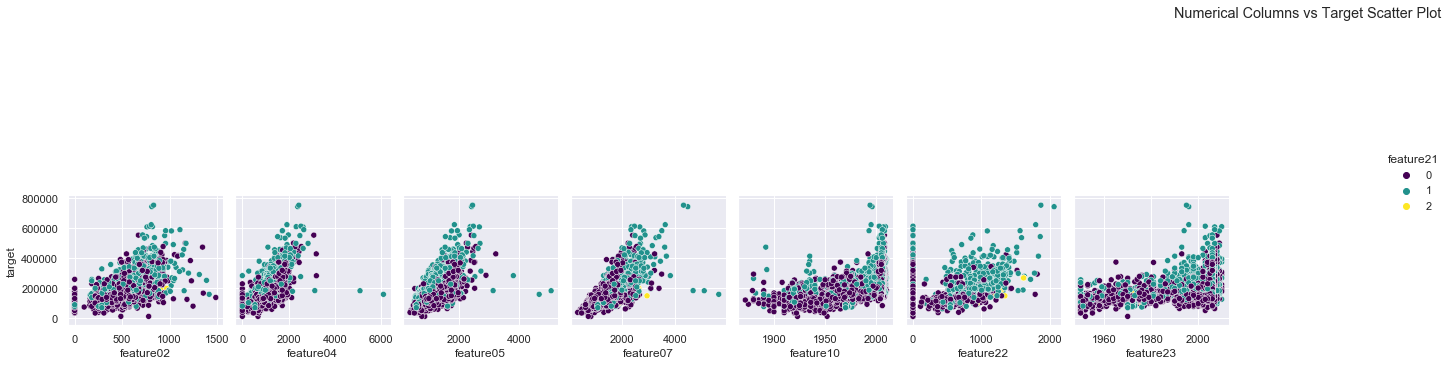

In [68]:
# pairplot of numerical columns
g = sns.pairplot(default,x_vars=(
 'feature02',
 'feature04',
 'feature05',
 'feature07',
 'feature10',
 'feature22',
 'feature23'), y_vars="target", hue ='feature21', palette = 'viridis')
g.fig.suptitle("Numerical Columns vs Target Scatter Plot", y=2,x=1)
plt.show()

In [71]:
default

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,1,215000,2.00,528.00,0,1080.00,1656,7,1656,6,5,1960,1,red,2,bad,3,1,5,2010,0,0,1960
1,2,105000,1.00,730.00,0,882.00,896,5,896,5,6,1961,1,red,0,bad,2,1,6,2010,0,0,1961
2,3,172000,1.00,312.00,0,1329.00,1329,6,1329,6,6,1958,1,red,0,good,3,1,6,2010,1,0,1958
3,4,244000,2.00,522.00,0,2110.00,2110,8,2110,7,5,1968,2,red,2,amazing,3,1,4,2010,1,0,1968
4,5,189900,2.00,482.00,0,928.00,928,6,1629,5,5,1997,2,red,1,bad,3,1,3,2010,1,701,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,142500,2.00,588.00,0,1003.00,1003,6,1003,6,6,1984,1,red,0,bad,3,1,3,2006,0,0,1984
2926,2927,131000,2.00,484.00,0,864.00,902,5,902,5,5,1983,1,red,0,bad,2,1,6,2006,0,0,1983
2927,2928,132000,0.00,0.00,0,912.00,970,6,970,5,5,1992,1,red,0,bad,3,1,7,2006,0,0,1992
2928,2929,170000,2.00,418.00,0,1389.00,1389,6,1389,5,5,1974,1,red,1,bad,2,1,4,2006,0,0,1975


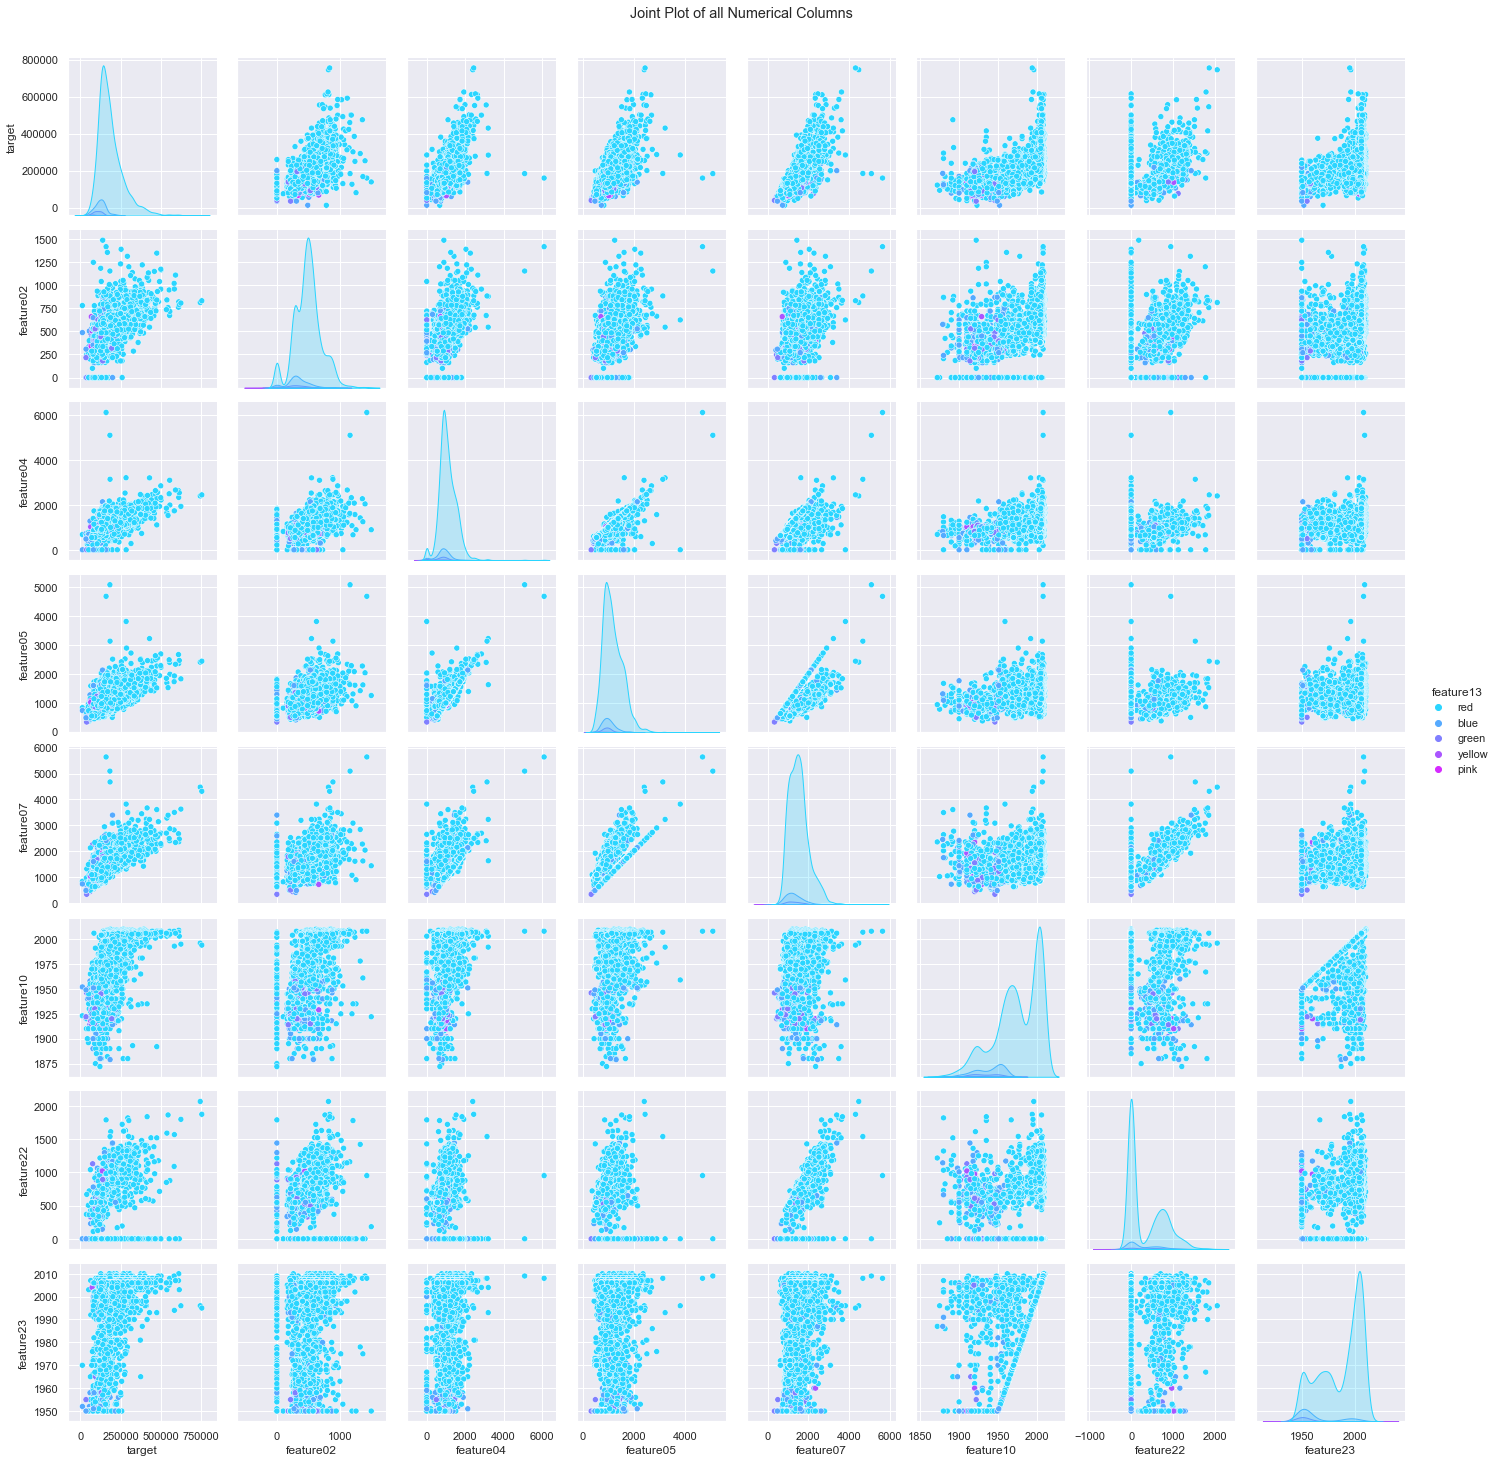

In [72]:
# pairplot of numerical columns
data = default[continuous+['feature13']]

g = sns.pairplot(data, diag_kind='kde', hue='feature13', palette='cool')
g.fig.suptitle("Joint Plot of all Numerical Columns", y=1.02)
plt.show()

In [76]:
default['target']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: target, Length: 2930, dtype: int64

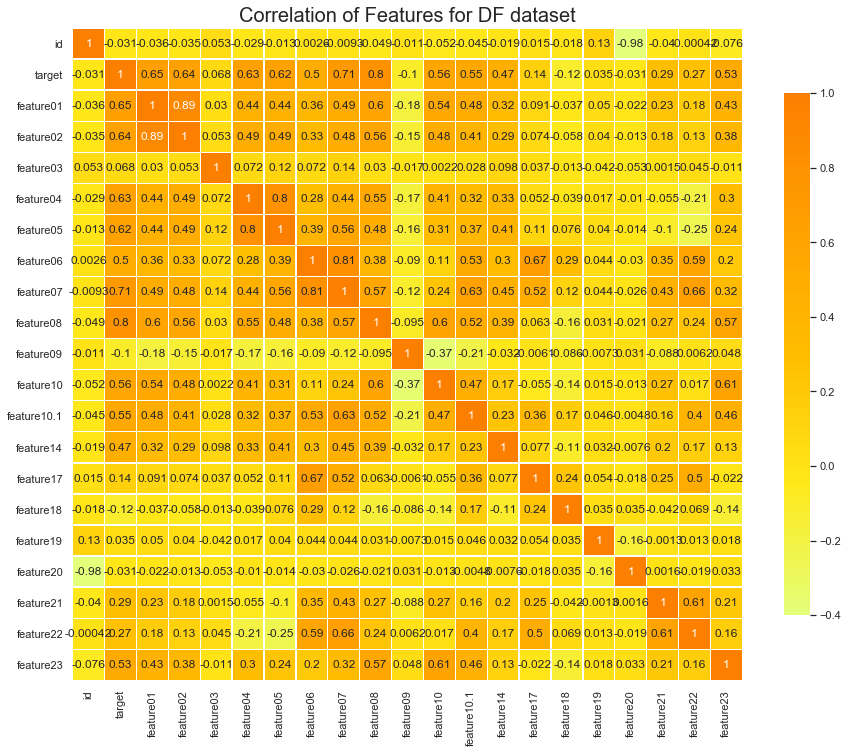

In [77]:
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for DF dataset', fontdict={'fontsize':20})
sns.heatmap(default.corr(),vmax=1.0, vmin=-0.4,  annot=True, cmap="Wistia",
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [80]:
continuous=continuous[1:]

In [82]:

default[continuous] = scaler.fit_transform(default[continuous])


In [87]:
default[categorical]

,feature01,feature03,feature06,feature08,feature09,feature10.1,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21
0,2.00,0,7,6,5,1,red,2,bad,3,1,5,2010,0
1,1.00,0,5,5,6,1,red,0,bad,2,1,6,2010,0
2,1.00,0,6,6,6,1,red,0,good,3,1,6,2010,1
3,2.00,0,8,7,5,2,red,2,amazing,3,1,4,2010,1
4,2.00,0,6,5,5,2,red,1,bad,3,1,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2.00,0,6,6,6,1,red,0,bad,3,1,3,2006,0
2926,2.00,0,5,5,5,1,red,0,bad,2,1,6,2006,0
2927,0.00,0,6,5,5,1,red,0,bad,3,1,7,2006,0
2928,2.00,0,6,5,5,1,red,1,bad,2,1,4,2006,0


In [101]:
default.dropna(how='any',inplace=True)

In [113]:
def get_int(x):
    try:
        return int(x)
    except Exception as e:
        return x

In [114]:
dumies=pd.get_dummies(default[list(categorical)].applymap(get_int).astype(str),drop_first=True, dtype=int)


In [115]:
dumies

,feature01_1,feature01_2,feature01_3,feature01_4,feature01_5,feature03_144,feature03_228,feature03_368,feature03_444,feature03_480,feature03_512,feature03_519,feature03_555,feature03_561,feature03_576,feature03_648,feature03_738,feature03_800,feature06_11,feature06_12,feature06_13,feature06_14,feature06_15,feature06_2,feature06_3,feature06_4,feature06_5,feature06_6,feature06_7,feature06_8,feature06_9,feature08_10,feature08_2,feature08_3,feature08_4,feature08_5,feature08_6,feature08_7,feature08_8,feature08_9,feature09_2,feature09_3,feature09_4,feature09_5,feature09_6,feature09_7,feature09_8,feature09_9,feature10.1_1,feature10.1_2,feature10.1_3,feature10.1_4,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature14_1,feature14_2,feature14_3,feature14_4,feature16_bad,feature16_good,feature16_horrible,feature16_okay,feature17_1,feature17_2,feature17_3,feature17_4,feature17_5,feature17_6,feature17_8,feature18_1,feature18_2,feature18_3,feature19_10,feature19_11,feature19_12,feature19_2,feature19_3,feature19_4,feature19_5,feature19_6,feature19_7,feature19_8,feature19_9,feature20_2007,feature20_2008,feature20_2009,feature20_2010,feature21_1,feature21_2
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2926,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2927,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2928,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [118]:
df=pd.concat([default[['target']+continuous],dumies],axis=1)


In [119]:
df

,target,feature02,feature04,feature05,feature07,feature10,feature22,feature23,feature01_1,feature01_2,feature01_3,feature01_4,feature01_5,feature03_144,feature03_228,feature03_368,feature03_444,feature03_480,feature03_512,feature03_519,feature03_555,feature03_561,feature03_576,feature03_648,feature03_738,feature03_800,feature06_11,feature06_12,feature06_13,feature06_14,feature06_15,feature06_2,feature06_3,feature06_4,feature06_5,feature06_6,feature06_7,feature06_8,feature06_9,feature08_10,feature08_2,feature08_3,feature08_4,feature08_5,feature08_6,feature08_7,feature08_8,feature08_9,feature09_2,feature09_3,feature09_4,feature09_5,feature09_6,feature09_7,feature09_8,feature09_9,feature10.1_1,feature10.1_2,feature10.1_3,feature10.1_4,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature14_1,feature14_2,feature14_3,feature14_4,feature16_bad,feature16_good,feature16_horrible,feature16_okay,feature17_1,feature17_2,feature17_3,feature17_4,feature17_5,feature17_6,feature17_8,feature18_1,feature18_2,feature18_3,feature19_10,feature19_11,feature19_12,feature19_2,feature19_3,feature19_4,feature19_5,feature19_6,feature19_7,feature19_8,feature19_9,feature20_2007,feature20_2008,feature20_2009,feature20_2010,feature21_1,feature21_2
0,215000,0.35,0.18,0.28,0.25,0.64,0.00,0.17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,105000,0.49,0.14,0.12,0.11,0.64,0.00,0.18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,172000,0.21,0.22,0.21,0.19,0.62,0.00,0.13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,244000,0.35,0.35,0.37,0.33,0.70,0.00,0.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,189900,0.32,0.15,0.12,0.24,0.91,0.34,0.80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,0.40,0.16,0.14,0.13,0.81,0.00,0.57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2926,131000,0.33,0.14,0.12,0.11,0.80,0.00,0.55,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2927,132000,0.00,0.15,0.13,0.12,0.87,0.00,0.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2928,170000,0.28,0.23,0.22,0.20,0.74,0.00,0.42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [180]:
#default = pd.get_dummies(default, drop_first=True, dtype=int)


In [121]:
df.columns

Index(['target', 'feature02', 'feature04', 'feature05', 'feature07',
       'feature10', 'feature22', 'feature23', 'feature01_1', 'feature01_2',
       'feature01_3', 'feature01_4', 'feature01_5', 'feature03_144',
       'feature03_228', 'feature03_368', 'feature03_444', 'feature03_480',
       'feature03_512', 'feature03_519', 'feature03_555', 'feature03_561',
       'feature03_576', 'feature03_648', 'feature03_738', 'feature03_800',
       'feature06_11', 'feature06_12', 'feature06_13', 'feature06_14',
       'feature06_15', 'feature06_2', 'feature06_3', 'feature06_4',
       'feature06_5', 'feature06_6', 'feature06_7', 'feature06_8',
       'feature06_9', 'feature08_10', 'feature08_2', 'feature08_3',
       'feature08_4', 'feature08_5', 'feature08_6', 'feature08_7',
       'feature08_8', 'feature08_9', 'feature09_2', 'feature09_3',
       'feature09_4', 'feature09_5', 'feature09_6', 'feature09_7',
       'feature09_8', 'feature09_9', 'feature10.1_1', 'feature10.1_2',
       'feature

In [125]:
df.corr()[['target']].apply(np.abs).sort_values('target',ascending=False)

,target
target,1.00
feature07,0.71
feature02,0.64
feature04,0.63
feature05,0.62
feature01_3,0.62
feature10,0.56
feature23,0.53
feature16_bad,0.53
feature10.1_1,0.52


In [140]:
# Features with the highest correlation with the target
top_corr_features = df.corr().loc['target'].apply(np.abs).sort_values(ascending=False).index[0:27]
top_corr_features

Index(['target', 'feature07', 'feature02', 'feature04', 'feature05',
       'feature01_3', 'feature10', 'feature23', 'feature16_bad',
       'feature10.1_1', 'feature08_9', 'feature10.1_2', 'feature08_8',
       'feature01_1', 'feature08_5', 'feature14_1', 'feature09_5',
       'feature08_10', 'feature16_good', 'feature21_1', 'feature22',
       'feature08_4', 'feature10.1_3', 'feature06_5', 'feature13_red',
       'feature14_2', 'feature06_9'],
      dtype='object')

In [137]:
target_name = 'target'
x = df[top_corr_features]
y = df[target_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
models = pd.DataFrame(index=['full_model_mse'], 
columns=['MLR', 'KNN', 'LASSO'])


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
target_name = 'target'
X = df[top_corr_features].drop('target', axis=1).values
y = df[target_name].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print('Train accuracy score:', accuracy_score(y_train, y_pred))
print('Test accuracy score:', accuracy_score(y_test, knn.predict(X_test)))
print(knn.score(X_test, y_test))

Train accuracy score: 0.11917983767620675
Test accuracy score: 0.005119453924914676
0.005119453924914676


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print('Train mse score:', mean_squared_error(y_train, reg_all.predict(X_train)))
print('Test mse score:', mean_squared_error(y_test, y_pred))
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


Train mse score: 858529256.1421485
Test mse score: 1507953786.062318
R^2: 0.7862311112274895
Root Mean Squared Error: 38832.380638615476


In [144]:
#R squared 0.78 means 78% of variability is being explained by x